# 95-869: Big Data and Large-Scale Computing Homework 1

## Introduction to PySpark and RDDs

The volume of unstructured text in existence is growing dramatically, and Spark is an excellent tool for analyzing this type of data.  In this homework, we will write code that calculates the most common words in the [Complete Works of William Shakespeare](http://www.gutenberg.org/ebooks/100) retrieved from [Project Gutenberg](http://www.gutenberg.org/wiki/Main_Page).

This could also be scaled to find the most common words in Wikipedia.

## In this homework, we will cover:

* *Part 1 (25 Points):* Creating a base RDD and pair RDDs
* *Part 2 (25 Points):* Counting with pair RDDs
* *Part 3 (25 Points):* Calculating wordsRDD Properties with Reduce()
* *Part 4 (25 Points):* Apply word count to a file

## Homework Requirements:

All exercises will include an explanation of what is expected, followed by code cells where one cell will have one or more `<FILL IN>` sections.  The cell that needs to be modified will have `# TODO: Replace <FILL IN> with appropriate code` on its first line.

## Submission Instructions:

You will submit a zipped file on Canvas by the deadline date.

Rename the notebook from "hw1_pyspark_rdd_student.ipynb" to "andrewid_hw1_pyspark_rdd_student.ipynb" where "andrewid" is your actual Andrew ID. Complete the assignment, execute all cells in the completed notebook, and make sure all results show up. Export the contents of the notebook by choosing "File > Download as > HTML" and saving the resulting file as "andrewid_hw1_pyspark_rdd_student.html" Place the two files "andrewid_hw1_pyspark_rdd_student.ipynb" and "andrewid_hw1_pyspark_rdd_student.html" in a folder, zip the folder to a zipped file named "andrewid_hw1.zip" and submit it to Canvas by the deadline.

#### Note that, for reference, you can look up the details of the relevant Spark methods in [Spark's Python API](https://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD) and the relevant NumPy methods in the [NumPy Reference](http://docs.scipy.org/doc/numpy/reference/index.html)

## Part 1: Creating a base RDD and pair RDDs

In this part, we will explore creating a base RDD with `parallelize` and using pair RDDs to count words.

Let's first start by creating the SparkContext

In [1]:
import sys
sys.path.append("/opt/packages/spark/latest/python/lib/py4j-0.10.9-src.zip")
sys.path.append("/opt/packages/spark/latest/python/")
sys.path.append("/opt/packages/spark/latest/python/pyspark")
from pyspark import SparkConf, SparkContext
sc = SparkContext()
sc

24/03/28 19:23:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/03/28 19:23:15 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


<SparkContext master=local[*] appName=pyspark-shell>

### (1a) Create a base RDD
We'll start by generating a base RDD by using a Python list and the `sc.parallelize` method.  Then we'll print out the type of the base RDD.

In [2]:
wordsList = ['cat', 'elephant', 'rat', 'rat', 'cat']
wordsRDD = sc.parallelize(wordsList, 4)
# Print out the type of wordsRDD
print (type(wordsRDD))

<class 'pyspark.rdd.RDD'>


### (1b) String Operations

The following functions provide three typical string operations you can conduct on a string:

(1) Pluralize,

(2) Captialize,

(3) Spell the word by inserting dashes between the characters.


We have provided the three operations' implementations below, please verify by looking at inputs and outputs of the three operations, with our given example 'cat'.

In [3]:
def makePlural(word):
    """Adds an 's' to `word`.
    Note:
        This is a simple function that only adds an 's'.  No attempt is made to follow proper
        pluralization rules.
    Args:
        word (str): A string.
    Returns:
        str: A string with 's' added to it.
    """
    return word + "s"

def makeCapital(word):
    """ Capitalize all characters for the 'word'
    Args: 
        word (str): A string.
    Retruns: 
        str: The same 'word' with all capital letters
    """
    return word.upper()


def insertDashes(word):
    """ Insert dashes "-" between all characters for the 'word'
    Args: 
        word (str): A string.
    Retruns: 
        str: A str that is the same as input, but '-' are inserted between each characters
             For example, 'word' will become 'w-o-r-d'
    """
    return '-'.join(word)

In [4]:
example = 'cat'
print(f"Plural forms for {example} is: {makePlural(example)}.")
print(f"Capitalized word for {example} is: {makeCapital(example)}.")
print(f"The word '{example}' is spelled as: {insertDashes(example)}.")

Plural forms for cat is: cats.
Capitalized word for cat is: CAT.
The word 'cat' is spelled as: c-a-t.


### (1c) Apply String Operations to the base RDD

Let's explore how to apply the string operation to all data in the RDD. 

Pass each item in the base RDD into a [map()](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.map) transformation that applies the `makeCapital()` function to each element. And then call the [collect()](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.collect) action to see the transformed RDD.

First, we want to convert all words in RDD to capitalized words. Please replace `<FILL IN>` with your solution.


In [5]:
# TODO: Replace <FILL IN> with appropriate code
capitalwordsRDD = wordsRDD.map(makeCapital)
print(capitalwordsRDD.collect())

['CAT', 'ELEPHANT', 'RAT', 'RAT', 'CAT']


### (1d) Pass a `lambda` function to `map`

`lambda` functions in Python are anonymous functions that are created for one-time use. 

First, let's capitalize all words in RDD, by using a `lambda` function (without having to call makeCapital).

In [6]:
# TODO: Replace <FILL IN> with appropriate code
capitalLambdaRDD = wordsRDD.map(lambda x: x.upper())
print(capitalLambdaRDD.collect())

['CAT', 'ELEPHANT', 'RAT', 'RAT', 'CAT']


### (1e) Combine `map` and `lambda` functions 

Now use `map` and `lambda` functions with the previously provided three string operation functions, to spell out the word (insert dashes between the characters) with all capital letters. 

For example, passing in 'cat' should spell out 'C-A-T'.

In [7]:
# TODO: Replace <FILL IN> with appropriate code
spelledCapitalRDD = wordsRDD.map(lambda x: insertDashes(makeCapital(x)))
print(spelledCapitalRDD.collect())

['C-A-T', 'E-L-E-P-H-A-N-T', 'R-A-T', 'R-A-T', 'C-A-T']


### (1f) Pair RDDs

The next step in writing our word counting program is to create a new type of RDD, called a pair RDD. A pair RDD is an RDD where each element is a pair tuple `(k, v)` where `k` is the key and `v` is the value. In this example, we will create a pair consisting of `('<word>', 1)` for each word element in the RDD.
We can create the pair RDD using the `map()` transformation with a `lambda()` function to create a new RDD.

In [8]:
# TODO: Replace <FILL IN> with appropriate code
wordPairs = wordsRDD.map(lambda x: (x, 1))
print(wordPairs.collect())

[('cat', 1), ('elephant', 1), ('rat', 1), ('rat', 1), ('cat', 1)]


## Part 2: Counting with pair RDDs

Now, let's count the number of times a particular word appears in the RDD. There are multiple ways to perform the counting, but some are much less efficient than others.

A naive approach would be to `collect()` and count them. The `collect()` first collects all data from the workers to the driver program. This can be inefficient and memory-consuming, especially with large datasets.

### (2a) `collect` and `Counter` to count all words

First, apply collect() to the RDD to mount them in the driver program.
Then count the words using [collections.Counter()](https://docs.python.org/3/library/collections.html#collections.Counter)

In [9]:
# TODO: Replace <FILL IN> with appropriate code
from collections import Counter
allWords = wordsRDD.collect()
wordCounts = Counter(allWords)
for word, count in wordCounts.items():
    print(f"The word '{word}' appears {count} times.")

The word 'cat' appears 2 times.
The word 'elephant' appears 1 times.
The word 'rat' appears 2 times.


### (2b) `groupByKey()` approach
Another approach is based on using the [groupByKey()](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.groupByKey) transformation. As the name implies, the `groupByKey()` transformation groups all the elements of the RDD with the same key into a single list in one of the partitions.

There are two problems with using `groupByKey()`:
  + The operation requires a lot of data movement to move all the values into the appropriate partitions.
  + The lists can be very large. Consider a word count of English Wikipedia: the lists for common words (e.g., the, a, etc.) would be huge and could exhaust the available memory in a worker.

Use `groupByKey()` to generate a pair RDD of type `('word', iterator)`.

In [10]:
# TODO: Replace <FILL IN> with appropriate code
# Note that groupByKey requires no parameters
wordsGrouped = wordPairs.groupByKey()
for key, value in wordsGrouped.collect():
    print ('{0}: {1}'.format(key, list(value)))

cat: [1, 1]
elephant: [1]
rat: [1, 1]


### Use `groupByKey()` to obtain the counts

Using the `groupByKey()` transformation creates an RDD containing 3 elements, each of which is a pair of a word and a Python iterator.

Now sum the iterator using a `map()` transformation.  The result should be a pair RDD consisting of (word, count) pairs.

In [11]:
# TODO: Replace <FILL IN> with appropriate code
wordCountsGrouped = wordsGrouped.map(lambda x: (x[0], sum(x[1])))
wordCounts = wordCountsGrouped.collect()
for word, count in wordCounts:
    print(f"The word '{word}' appears {count} times.")

The word 'cat' appears 2 times.
The word 'elephant' appears 1 times.
The word 'rat' appears 2 times.


### (2c) Counting using `reduceByKey`

A better approach is to start from the pair RDD and then use the [reduceByKey()](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.reduceByKey) transformation to create a new pair RDD. The `reduceByKey()` transformation gathers together pairs that have the same key and applies the function provided to two values at a time, iteratively reducing all of the values to a single value. `reduceByKey()` operates by applying the function first within each partition on a per-key basis and then across the partitions, allowing it to scale efficiently to large datasets. 

In our example, `reduceByKey()` is applied which merges the values (counts) for each key (word) before shuffling. This significantly reduces the amount of data being shuffled because only unique keys with aggregated counts are shuffled. It should be the most efficient method among three methods.

In [12]:
# TODO: Replace <FILL IN> with appropriate code
# Note that reduceByKey takes in a function that accepts two values and returns a single value
wordCountsGrouped = wordPairs.reduceByKey(lambda x, y: x + y)
wordCounts = wordCountsGrouped.collect()
for word, count in wordCounts:
    print(f"The word '{word}' appears {count} times.")

The word 'cat' appears 2 times.
The word 'elephant' appears 1 times.
The word 'rat' appears 2 times.


### (2d) All together

The expert version of the code performs the `map()` to pair RDD, `reduceByKey()` transformation, and `collect` in one statement.

In [13]:
# TODO: Replace <FILL IN> with appropriate code
wordCountsCollected = (wordsRDD
                       .map(lambda x: (x, 1))
                       .reduceByKey(lambda x, y: x + y)
                       .collect())
print (wordCountsCollected)

[('cat', 2), ('elephant', 1), ('rat', 2)]


### (2e) Time Complexity Analysis

 Now, let's compare the running time of each method. 

First, write three functions that pass in wordRDD as a paramter, and print out the word counts for each word.  

__Note__: Just to measure the time it takes to run the wordRDD, we have commented out all the print statements. You can include the commented code to check the correctness of your algorithm.

In [18]:
# TODO: Replace <FILL IN> with appropriate code
def wordCount_2a(wordsRDD):
    """Count the word appearances in the RDD file, using the collect() and Counter() method
       we have provided in 2(a).
    Args:
        wordsRDD: an RDD object of words
    """
    allWords = wordsRDD.collect()
    wordCounts = Counter(allWords)
    for word, count in wordCounts.items():
        print(f"The word '{word}' appears {count} times.")
     
    
def wordCount_2b(wordsRDD):
    """Count the word appearances in the RDD file, using the groupby() method
       we have provided in 2(b). 
    Args:
        wordsRDD: an RDD object of words
    """
    wordPairs = wordsRDD.map(lambda x: (x, 1))
    wordsGrouped = wordPairs.groupByKey()
    wordCountsGrouped = wordsGrouped.map(lambda x: (x[0], sum(x[1])))
    wordCounts = wordCountsGrouped.collect()
    for word, count in wordCounts:
        print(f"The word '{word}' appears {count} times.")
        
        
def wordCount_2c(wordsRDD):
    """Count the word appearances in the RDD file, using the reducekey() method
       we have provided in 2(c). 
    Args:
        wordsRDD: an RDD object of words
    """
    wordPairs = wordsRDD.map(lambda x: (x, 1))
    wordCountsGrouped = wordPairs.reduceByKey(lambda x, y: x + y)
    wordCounts = wordCountsGrouped.collect()
    for word, count in wordCounts:
        print(f"The word '{word}' appears {count} times.")

Now, let's build a list with more words, and test out the time for each function to count all the words. 

In [21]:
import time

start_time = time.time()
wordCount_2a(wordsRDD)

print("Time to run 2(a): %3f" % (time.time() - start_time))
print()

start_time = time.time()
wordCount_2b(wordsRDD)
print("Time to run 2(b): %3f" % (time.time() - start_time))
print()

start_time = time.time()
wordCount_2c(wordsRDD)
print("Time to run 2(c): %3f" % (time.time() - start_time))

The word 'cat' appears 2 times.
The word 'elephant' appears 1 times.
The word 'rat' appears 2 times.
Time to run 2(a): 0.016130

The word 'cat' appears 2 times.
The word 'elephant' appears 1 times.
The word 'rat' appears 2 times.
Time to run 2(b): 0.140492

The word 'cat' appears 2 times.
The word 'elephant' appears 1 times.
The word 'rat' appears 2 times.
Time to run 2(c): 0.131163


#### Prevsiouly we have hypothesized that 2(c) (utilizing `reduceByKey()`) is the most efficient method across three methods. Are the observations of the time complexity above consistent with our hypothesis? If yes, please explain. If not, provide potential reasons of the inconsistency?

<span style="color:red"> <p>**wordCount_2a** (using `collect()` and `Counter()`) is the fastest among the three methods. However, this approach is not recommended for large datasets because it involves collecting all the data to the driver, which can be inefficient and memory-intensive.</p><p>
**wordCount_2c** (using `reduceByKey()`) is slightly faster than wordCount_2b (using groupByKey()). This is because reduceByKey() performs the reduction operation first within each partition and then across the partitions, significantly reducing the amount of data that needs to be shuffled across the cluster. This makes it more efficient and scalable for large datasets compared to groupByKey(), which requires moving all the values into the appropriate partitions.</p><p>
The difference in execution times between **wordCount_2b** and wordCount_2c is relatively small in this example because the dataset is small (only a few words). However, as the dataset size grows, the performance advantage of reduceByKey() over `groupByKey()` is expected to become more significant due to the efficient data shuffling and distributed computation.</p>

### (2f) Time Complexity Test for Large Dataset

Just run the following code, and comment on your observations of time complexity it takes for 2(a), 2(b), 2(c). 

The word 'cat' appears 2 times.
The word 'elephant' appears 1 times.
The word 'rat' appears 2 times.
The word 'elephant' appears 1 times.
The word 'cat' appears 2 times.
The word 'rat' appears 2 times.
The word 'elephant' appears 1 times.
The word 'cat' appears 2 times.
The word 'rat' appears 2 times.
The word 'cat' appears 500000 times.
The word 'elephant' appears 500000 times.
The word 'rat' appears 500000 times.
The word 'elephant' appears 500000 times.
The word 'cat' appears 500000 times.
The word 'rat' appears 500000 times.
The word 'elephant' appears 500000 times.
The word 'cat' appears 500000 times.
The word 'rat' appears 500000 times.
The word 'cat' appears 1000000 times.
The word 'elephant' appears 1000000 times.
The word 'rat' appears 1000000 times.
The word 'elephant' appears 1000000 times.
The word 'cat' appears 1000000 times.
The word 'rat' appears 1000000 times.
The word 'elephant' appears 1000000 times.
The word 'cat' appears 1000000 times.
The word 'rat' appears 1000000

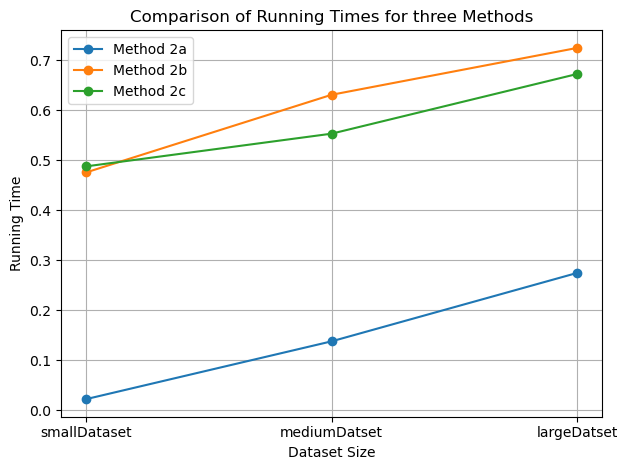

In [22]:
def get_running_time(wordsRDD):
    start_time = time.time()
    wordCount_2a(wordsRDD)
    atime = time.time() - start_time


    start_time = time.time()
    wordCount_2b(wordsRDD)
    btime = time.time() - start_time

    start_time = time.time()
    wordCount_2c(wordsRDD)
    ctime = time.time() - start_time
    
    return [atime,btime,ctime]


#Finding the running time for small size, median size and large size datasets 
smallWordsList = ['cat', 'elephant', 'rat', 'rat', 'cat']
smallWordsRDD = sc.parallelize(smallWordsList, 32)
smallRunningTime = get_running_time(smallWordsRDD)

moderateWordsList = ['cat']*500000 + ['elephant'] *500000 + ['rat']*500000
moderateWordsRDD = sc.parallelize(moderateWordsList, 32)
moderateRunningTime = get_running_time(moderateWordsRDD)

largeWordsList = ['cat']*1000000 + ['elephant'] *1000000 + ['rat']*1000000
largeWordsRDD = sc.parallelize(largeWordsList, 32)
largeRunningTime = get_running_time(largeWordsRDD)

overallTime = [list(row) for row in zip(*[smallRunningTime,moderateRunningTime,largeRunningTime])]

labels = ['Method 2a', 'Method 2b', 'Method 2c']
datasets = ['smallDataset', 'mediumDatset', 'largeDatset']


import matplotlib.pyplot as plt

#plot the time it takes for three methods
for i, method in enumerate(overallTime):
    plt.plot(datasets, method, label=labels[i], marker='o')

plt.xlabel('Dataset Size')
plt.ylabel('Running Time')
plt.title('Comparison of Running Times for three Methods')
plt.legend()

plt.tight_layout()
plt.grid(True)
plt.show()

#### Write down your hypothesis: if the dataset is growing larger and larger. What could happen? Which method should take the least amount of time?

<span style="color:red"><p>As the dataset size increases, the running time for all methods also increases. Method 2c (using `reduceByKey()`) should take the least amount of time since it combines output with a common key on each partition before shuffling the data, which is generally more efficient than `groupByKey()` for large datasets. `collect()` with `Counter()` (Method 2a) is likely to be the least scalable due to the need to move all data to a single node.</p>

## Part 3: Calculating wordsRDD Properties with Reduce()

### (3a) Unique words

Calculate the number of unique words in `wordsRDD`.  You can use other RDDs that you have already created to make this easier.

In [24]:
# TODO: Replace <FILL IN> with appropriate code
uniqueWords = wordsRDD.distinct().collect()
print (uniqueWords)
print (len(uniqueWords))

['cat', 'elephant', 'rat']
3


### (3b) Finding the longest word using `reduce()`

Finding the longest words in `wordsRDD``.

Note: `lambda` function can also take in two parameters.
For example, `lambda a,b : a+b` finds the sum of two numbers, a and b. You can operate the lambda function to find the sum of a list of numbers. See below. 
```
from functools import reduce

numbers = [1, 2, 3]
sum_result = reduce(lambda a, b: a+b, numbers)
print(sum_result)  # Output: 6
```

Similar to the calculation on summation, we can use `lambda` to find the longest word in the list.

In [25]:
# TODO: Replace <FILL IN> with appropriate code
longestWord = wordsRDD.reduce(lambda a, b: a if len(a) >= len(b) else b)
print(longestWord)

elephant


### (3c) Finding the least frequent word using reduce()

Finding the **least** frequent words in `wordsRDD`. Remember, we have previously found the word counts with `wordCountsGrouped`. Now, we just need to apply `reduce()` with the `lambda` function to the `wordCountsGrouped`. 

In [26]:
# TODO: Replace <FILL IN> with appropriate code
leastFrequent = wordCountsGrouped.reduce(lambda a, b: a if a[1] < b[1] else b)
print(leastFrequent)

('elephant', 1)


### (3d) Limitations of reduce()

The ``reduce()`` method in Apache Spark's RDD requires that the lambda function provided is both associative and commutative. If it's not, you can get unpredictable and incorrect results due to the distributed nature of the computation. To demonstrate this, let's consider an example using subtraction, which is not associative:

``lambda x,y : x-y``

When executed, you'll get the result of sequentially subtracting every number in the list from the previous result. For a list of numbers from $0, 1, 2, ...99$, this will give you: 

$$0 − 1 − 2 − 3−... − 99 = −4950$$

and the result will be $−4950$.

Run the code below and change the numSlices (the number of partitions the RDD will be divided into) in ``sc.parallelize(data, numSlices)``. 

In [31]:
# TODO: Replace <FILL IN> with appropriate code
# Run the following code four times with different numSlices in the sc.parallelize

numberList = list(range(100))
# Run with numSlices = 1
numberRdd = sc.parallelize(numberList, 1)
result = numberRdd.reduce(lambda x, y: x - y)
print(result)
# Run with numSlices = 2
numberRdd = sc.parallelize(numberList, 2)
result = numberRdd.reduce(lambda x, y: x - y)
print(result)
# Run with numSlices = 4
numberRdd = sc.parallelize(numberList, 4)
result = numberRdd.reduce(lambda x, y: x - y)
print(result)
# Run with numSlices = 8
numberRdd = sc.parallelize(numberList, 8)
result = numberRdd.reduce(lambda x, y: x - y)
print(result)

-4950
2400
4050
4146


#### What is your observation? Why does it occur?

<span style="color:red"><p>The varying results come from the subtraction's non-associative property in the reduce() function. When the data is split across multiple partitions, subtraction sequences differ, leading to inconsistent outcomes. For example, a single partition computes a straight sequence, while multiple partitions subtract in segments, then combine those results, giving varied answers.</p><p>For example, with numSlices = 2, one possible scenario is that the first partition contains [0, 1, 2, ..., 49], and the second partition contains [50, 51, 52, ..., 99]. The subtraction within each partition might happen as:
    <p>Partition 1: 0 - 1 - 2 ... - 49 = -1275</p>
    <p>Partition 2: 50 - 51 - 52 ... - 99 = -3675</p>
<p>Then, the reduction across partitions would be -1275 - (-3675) = 2400.</p>

## Part 4: Apply word count to a file

In this section we will finish developing our word count application.  We'll have to build the `wordCount` function, deal with real world problems like capitalization and punctuation, load in our data source, and compute the word count on the new data.

### (4a) `wordCount` function

First, define a function for word counting.  You should reuse the techniques that have been covered in earlier parts of this assignment.  This function should take in an RDD that is a list of words like `wordsRDD` and return a pair RDD that has all of the words and their associated counts.

In [32]:
# TODO: Replace <FILL IN> with appropriate code
def wordCount(wordListRDD):
    """Creates a pair RDD with word counts from an RDD of words.

    Args:
        wordListRDD (RDD of str): An RDD consisting of words.

    Returns:
        RDD of (str, int): An RDD consisting of (word, count) tuples.
    """
    wordPairs = wordListRDD.map(lambda word: (word, 1))
    wordCounts = wordPairs.reduceByKey(lambda count1, count2: count1 + count2)
    return wordCounts
print (wordCount(wordsRDD).collect())

[('cat', 2), ('elephant', 1), ('rat', 2)]


### (4b) Capitalization and punctuation

Real world files are more complicated than the data we have been using thus far. Some of the issues we have to address are:
  + Words should be counted independent of their capitialization (e.g., Spark and spark should be counted as the same word).
  + All punctuation should be removed.
  + Any leading or trailing spaces on a line should be removed.

Define the function `removePunctuation` that converts all text to lower case, removes any punctuation, and removes leading and trailing spaces.  Use the Python [re](https://docs.python.org/2/library/re.html) module to remove any text that is not a letter, number, or space. Reading `help(re.sub)` might be useful.
If you are unfamiliar with regular expressions, you may want to review [this tutorial](https://developers.google.com/edu/python/regular-expressions) from Google.  Also, [this website](https://regex101.com/#python) is  a great resource for debugging your regular expression.

In [33]:
# TODO: Replace <FILL IN> with appropriate code
import re
def removePunctuation(text):
    """Removes punctuation, changes to lower case, and strips leading and trailing spaces.

    Note:
        Only spaces, letters, and numbers should be retained.  Other characters should should be
        eliminated (e.g. it's becomes its).  Leading and trailing spaces should be removed after
        punctuation is removed.

    Args:
        text (str): A string.

    Returns:
        str: The cleaned up string.
    """
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.strip().lower()
    return text
print (removePunctuation('Hi, you!'))
print (removePunctuation(' No under_score!'))
print (removePunctuation(' *      Remove punctuation then spaces  * '))

hi you
no underscore
remove punctuation then spaces


### (4c) Load a text file

For the next part of this lab, we will use the [Complete Works of William Shakespeare](http://www.gutenberg.org/ebooks/100) from [Project Gutenberg](http://www.gutenberg.org/wiki/Main_Page). To convert a text file into an RDD, we use the `SparkContext.textFile()` method. We also apply the recently defined `removePunctuation()` function using a `map()` transformation to strip out the punctuation and change all text to lower case.  Since the file is large we use `take(15)`, so that we only print 15 lines.

In [34]:
# Just run this code

fileName = 'file:///ocean/projects/cis220071p/shared/data/shakespeare.txt'

shakespeareRDD = sc.textFile(fileName, 8).map(removePunctuation)
sampleLines = ('\n'.join(shakespeareRDD
                .zipWithIndex()  # to (line, lineNum)
                .map(lambda t: '{0}: {1}'.format(t[1], t[0]))  # to 'lineNum: line'
                .take(15)))
print (sampleLines)

0: the project gutenberg ebook of the complete works of william shakespeare by
1: william shakespeare
2: 
3: this ebook is for the use of anyone anywhere at no cost and with
4: almost no restrictions whatsoever  you may copy it give it away or
5: reuse it under the terms of the project gutenberg license included
6: with this ebook or online at wwwgutenbergorg
7: 
8: this is a copyrighted project gutenberg ebook details below
9: please follow the copyright guidelines in this file
10: 
11: title the complete works of william shakespeare
12: 
13: author william shakespeare
14: 


### (4d) Words from lines

Before we can use the `wordcount()` function, we have to address two issues with the format of the RDD:
  + The first issue is that we need to split each line by its spaces. ** Performed in (4d). **
  + The second issue is we need to filter out empty lines. ** Performed in (4e). **

Apply a transformation that will split each element of the RDD by its spaces. For each element of the RDD, you should apply Python's string [split()](https://docs.python.org/2/library/string.html#string.split) function. You might think that a `map()` transformation is the way to do this, but think about what the result of the `split()` function will be.

> Note:
> * Do not use the default implementation of `split()`, but pass in a separator value.  For example, to split `line` by commas you would use `line.split(',')`.

In [35]:
# TODO: Replace <FILL IN> with appropriate code
shakespeareWordsRDD = shakespeareRDD.flatMap(lambda line: line.split(' '))
shakespeareWordCount = shakespeareWordsRDD.count()
print (shakespeareWordsRDD.top(5))
print (shakespeareWordCount)

['zwaggerd', 'zounds', 'zounds', 'zounds', 'zounds']
949103


### (4e) Remove empty elements
The next step is to filter out the empty elements. Remove all entries where the word is ''.

In [36]:
# TODO: Replace  with appropriate code
shakeWordsRDD = shakespeareWordsRDD.filter(lambda word: word != '')
shakeWordCount = shakeWordsRDD.count()
print (shakeWordCount)

903731


### (4f) Count the words

We now have an RDD that is only words.  Next, let's apply the `wordCount()` function to produce a list of word counts. We can view the top 15 words by using the `takeOrdered()` action; however, since the elements of the RDD are pairs, we need a custom sort function that sorts using the value part of the pair.

You'll notice that many of the words are common English words. These are called stopwords. In a later lab, we will see how to eliminate them from the results.
Use the `wordCount()` function and `takeOrdered()` to obtain the fifteen most common words and their counts.

In [37]:
# TODO: Replace <FILL IN> with appropriate code
top15WordsAndCounts = shakeWordsRDD.map(lambda word: (word, 1))\
                                   .reduceByKey(lambda a, b: a + b)\
                                   .takeOrdered(15, key=lambda x: -x[1])
print ('\n'.join(map(lambda t: '{0}: {1}'.format(t[0], t[1]), top15WordsAndCounts)))

the: 27825
and: 26791
i: 20681
to: 19262
of: 18289
a: 14667
you: 13716
my: 12480
that: 11135
in: 11027
is: 9621
not: 8745
for: 8261
with: 8046
me: 7768


### The End